# Date patterns of flow

### Change in water level during given period of time

### defining necessary libraries

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf

### importing the data set

In [2]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### basic statistics

In [35]:
print(flow.describe())

                flow
count  255419.000000
mean      109.166087
std        23.698688
min      -253.750000
25%        95.860001
50%       112.879997
75%       123.250000
max       599.869995


### converting the data type of time

In [3]:
flow['time'] = pd.to_datetime(flow['time'], format='%Y-%m-%d %H:%M:%S')
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### creating variables

In [4]:
t = flow['time']
f = flow['flow']

### plotting one day

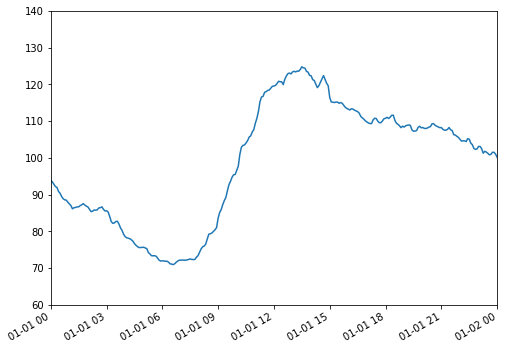

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 2, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting first half of the day

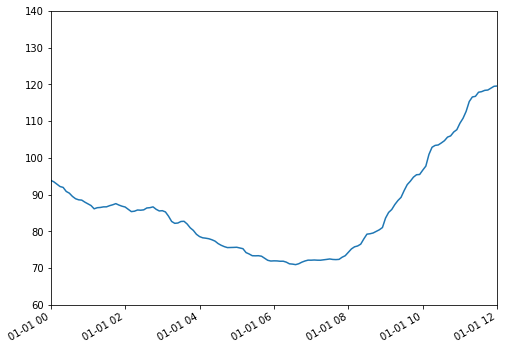

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 1, 12,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting second half of the day

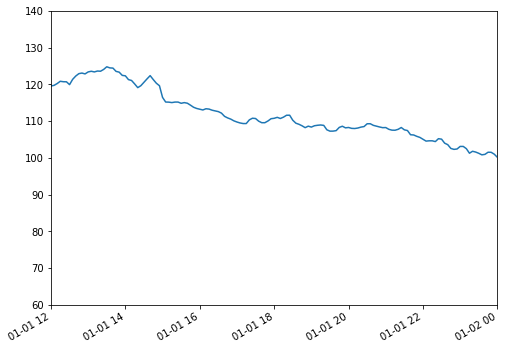

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 12,0), dt.datetime(2016, 1, 2, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting two days 

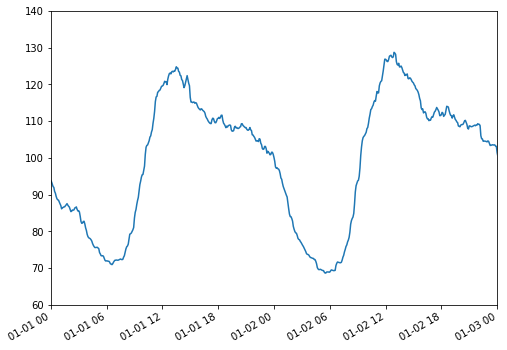

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 3, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting one week

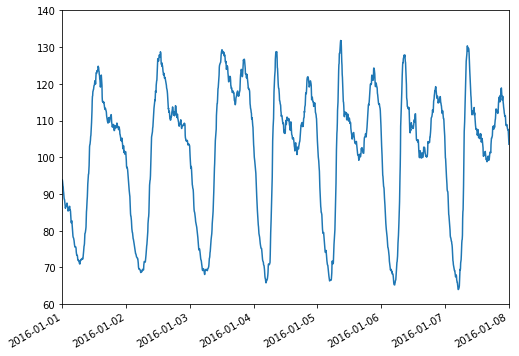

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 8, 0,0)])
ax.set_ylim(60, 140)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### plotting two weeks

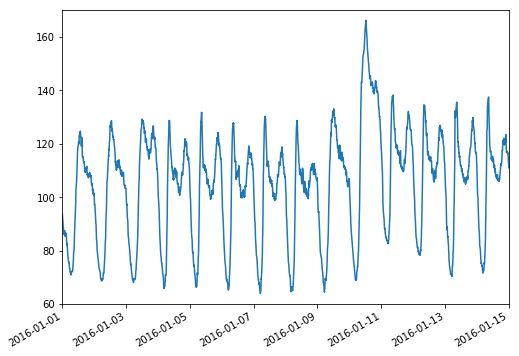

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlim([dt.datetime(2016, 1, 1, 0,0), dt.datetime(2016, 1, 15, 0,0)])
ax.set_ylim(60, 170)
ax.plot(t,f)
plt.gcf().autofmt_xdate()

### variable with average day value

In [11]:
flow_df = pd.DataFrame(flow)

In [12]:
flow_df.index

RangeIndex(start=0, stop=255419, step=1)

In [13]:
#daily mean of value
data_d = pd.read_csv('../dataset/flow1.csv', parse_dates={'timestamp':['time']},index_col='timestamp')
dayfirst=True
dataAvD = data_d.resample('D', how = 'mean')

/home/alicja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


### variable with average hour value

In [14]:
flow.dtypes

time    datetime64[ns]
flow           float64
dtype: object

In [15]:
data_h = pd.read_csv('../dataset/flow1.csv', parse_dates={'time_h':['time']},index_col='time_h')
dayfirst=True
dataAvH = data_h.resample('H', how = 'mean')

/home/alicja/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


### correlogram of the data hourly (range 0:100)

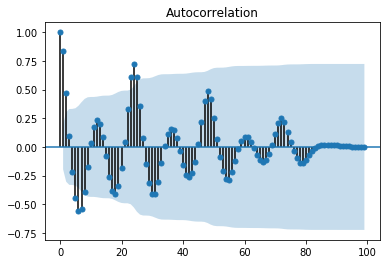

In [16]:
dataAvH2 = dataAvH[0:100]
series = dataAvH2
plot_acf(series)
pyplot.show()

### correlogram of the data hourly (one day)

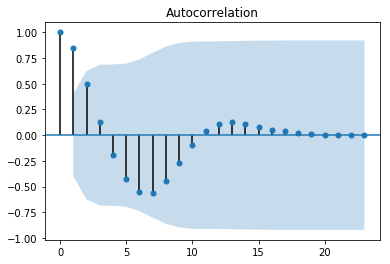

In [17]:
dataAvH2 = dataAvH[0:24]
series = dataAvH2
plot_acf(series)
pyplot.show()

### correlogram of the data hourly (3 days)

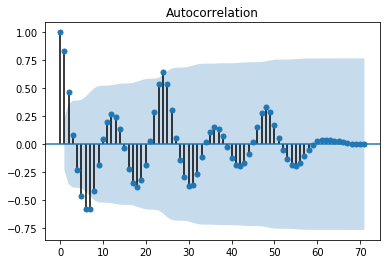

In [18]:
dataAvH3 = dataAvH[0:72]
series = dataAvH3
plot_acf(series)
pyplot.show()

### correlogram of the data hourly (two weeks)

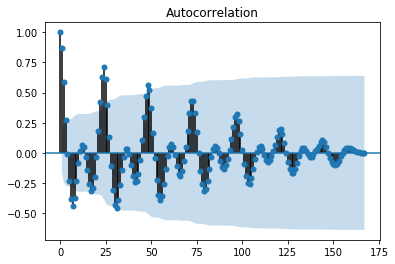

In [19]:
dataAvH4 = dataAvH[0:168]
series = dataAvH4
plot_acf(series)
pyplot.show()

### correlogram of the data hourly (0:100)

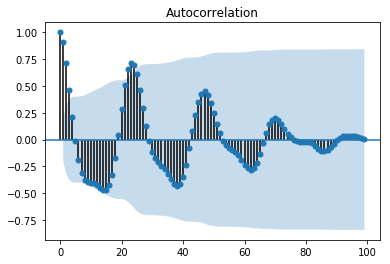

In [39]:
dataAvH_year = dataAvH['2016-01-01':'2016-12-31']
series = dataAvH_year[0:100]
plot_acf(series)
pyplot.show()